In [5]:
# First, as always we import every dependancies first

from tensorflow import keras
import sklearn
from sklearn import decomposition
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import librosa
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

from src.VoiceModule import VoiceModule

In [6]:
# Here I setup pathes and variables
folder_path = "../../data"
emotion_list = ["calm", "happy", "angry", "fearful", "sad"]
# This will be usefull to get the label name from the one_hot vector
# The last argument is the classifier but we set it at none because we won't need one
vm = VoiceModule("emotion", emotion_list, None)

X_file = f"x_{'_'.join(emotion_list)}-{vm._name}.npy"
Y_file = f"y_{'_'.join(emotion_list)}-{vm._name}.npy"

X_savee_file = f"X_savee_{'_'.join(emotion_list)}-{vm._name}.npy"
Y_savee_file = f"Y_savee_{'_'.join(emotion_list)}-{vm._name}.npy"


In [7]:
# Now we load the data
"""
    This numpy file has been generated with other jupyter notebooks
    It's format is: [[
    mfcc
    ]]
"""
X, Y = np.load(X_file), np.load(Y_file)

X_savee, Y_savee = np.load(X_savee_file), np.load(Y_savee_file)


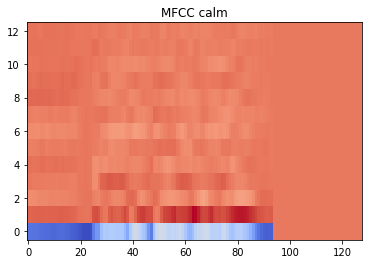

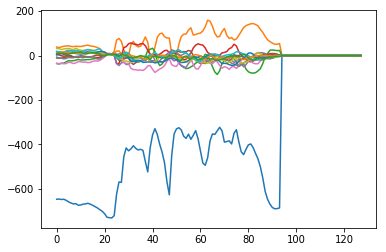

Everything is good :D


In [10]:
# Here we print one sample to see if everything is good
mfcc_feat = X[0]

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC ' + vm.get_label_from_vector(Y[0])[0])
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()
print("Everything is good :D")

angry


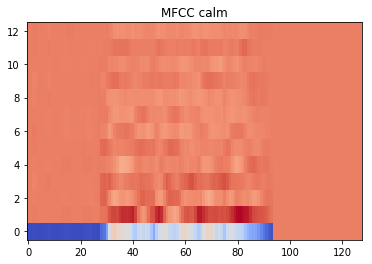

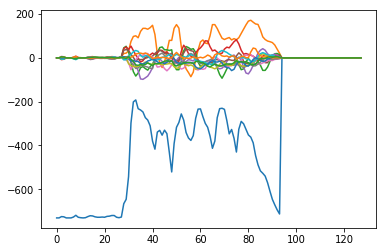

In [11]:
print(vm.get_label_from_vector(Y[400])[0])
mfcc_feat = X[400]
ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC ' + vm.get_label_from_vector(Y[0])[0])
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()


In [12]:
# Now I will do a PCA on the data
#To perform PCA 
X_mean = np.mean(X, axis=2)
X_savee_mean = np.mean(X_savee, axis=2)
print(X_mean.shape)
pca = decomposition.PCA(n_components=2)
pca.fit(X_mean)
X_pca = pca.transform(X_mean)

(962, 128)


(962, 5)
(962,) 0 2


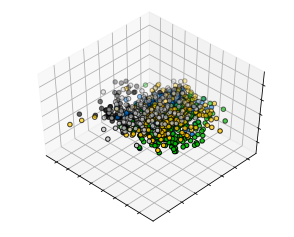

In [13]:
# Now we display it

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

print(Y.shape)
y = np.argmax(Y, axis=1)
y_savee = np.argmax(Y_savee, axis=1)
print(y.shape, y[0], y[400])
# Reorder the labels to have colors matching the cluster results
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [14]:
# Now I will do k-mean see if we can find some cluster


kmeans = sklearn.cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X_mean)
r = kmeans.predict([X_mean[0]])
print(r)

[4]


In [15]:
# Here I train a SVM to classify RAVDESS labels
clf = sklearn.svm.SVC(kernel='rbf')
clf.fit(X_mean, y)
Y_pred = clf.predict(X_mean)
print(confusion_matrix(y, Y_pred))
print(classification_report(y, Y_pred, target_names=emotion_list))


[[104  23  17  10  38]
 [ 12  60  35  42  43]
 [ 10  28 114  23  18]
 [ 19  27  27  83  37]
 [ 53  30  13  25  71]]
              precision    recall  f1-score   support

        calm       0.53      0.54      0.53       192
       happy       0.36      0.31      0.33       192
       angry       0.55      0.59      0.57       193
     fearful       0.45      0.43      0.44       193
         sad       0.34      0.37      0.36       192

    accuracy                           0.45       962
   macro avg       0.45      0.45      0.45       962
weighted avg       0.45      0.45      0.45       962



In [16]:
# Here I train a SVM to classify SAVEE labels
clf_savee = sklearn.svm.SVC(kernel='rbf')
clf_savee.fit(X_savee_mean, y_savee)
Y_pred = clf_savee.predict(X_savee_mean)
print(confusion_matrix(y_savee, Y_pred))
print(classification_report(y_savee, Y_pred, target_names=emotion_list))

[[29  8  2  0 31]
 [ 3 32 17  0 20]
 [ 1 14 38  2 13]
 [10  9  2  2 42]
 [ 6  2  4  2 71]]
              precision    recall  f1-score   support

        calm       0.59      0.41      0.49        70
       happy       0.49      0.44      0.47        72
       angry       0.60      0.56      0.58        68
     fearful       0.33      0.03      0.06        65
         sad       0.40      0.84      0.54        85

    accuracy                           0.48       360
   macro avg       0.48      0.46      0.43       360
weighted avg       0.48      0.48      0.44       360



In [17]:
# Here I try to classify SAVEE's labels with the SVM trained on RAVDESS
Y_pred = clf.predict(X_savee_mean)
print(confusion_matrix(y_savee, Y_pred))
print(classification_report(y_savee, Y_pred, target_names=emotion_list))

[[ 0  0 28 42  0]
 [ 0  0 32 40  0]
 [ 0  0 28 40  0]
 [ 0  0 31 34  0]
 [ 0  0 44 41  0]]
              precision    recall  f1-score   support

        calm       0.00      0.00      0.00        70
       happy       0.00      0.00      0.00        72
       angry       0.17      0.41      0.24        68
     fearful       0.17      0.52      0.26        65
         sad       0.00      0.00      0.00        85

    accuracy                           0.17       360
   macro avg       0.07      0.19      0.10       360
weighted avg       0.06      0.17      0.09       360



/home/arc/fdp5/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
a = False
i = 0
spl_x = [[], [], [], [], [], []]
for i, e_y in enumerate(y):
    spl_x[e_y].append(X[i])

mean_list = []
sd_list = []
for i in range(0, len(emotion_list)):
    mean_list.append(np.mean(spl_x[i], axis=0))
    sd_list.append(np.std(spl_x[i], axis=0))
    print(f"{emotion_list[i]}: standard deviation: {round(np.linalg.norm(sd_list[-1]))}")

# distance between every barycenters
dist_all_means = list(map(lambda x: np.linalg.norm(x[0] - x[1]), itertools.combinations(mean_list, 2)))
for emotion_names, dist in zip(itertools.combinations(emotion_list, 2), dist_all_means):
    print(f"{emotion_names[0]} - {emotion_names[1]} = {round(dist)}")

calm: standard deviation: 1161
happy: standard deviation: 1333
angry: standard deviation: 1470
fearful: standard deviation: 1498
sad: standard deviation: 1349
calm - happy = 1358
calm - angry = 2125
calm - fearful = 1516
calm - sad = 526
happy - angry = 893
happy - fearful = 260
happy - sad = 881
angry - fearful = 809
angry - sad = 1695
fearful - sad = 1033


In [19]:
a = False
i = 0
spl_x = [[], [], [], [], []]
for i, e_y in enumerate(y_savee):
    spl_x[e_y].append(X_savee[i])

mean_list = []
sd_list = []
for i in range(0, len(emotion_list)):
    mean_list.append(np.mean(spl_x[i], axis=0))
    sd_list.append(np.std(spl_x[i], axis=0))
    print(f"{emotion_list[i]}: standard deviation: {round(np.linalg.norm(sd_list[-1]))}")

# distance between every barycenters
dist_all_means = list(map(lambda x: np.linalg.norm(x[0] - x[1]), itertools.combinations(mean_list, 2)))
for emotion_names, dist in zip(itertools.combinations(emotion_list, 2), dist_all_means):
    print(f"{emotion_names[0]} - {emotion_names[1]} = {round(dist)}")

calm: standard deviation: 1779
happy: standard deviation: 1805
angry: standard deviation: 1865
fearful: standard deviation: 1829
sad: standard deviation: 1773
calm - happy = 1134
calm - angry = 1315
calm - fearful = 917
calm - sad = 350
happy - angry = 292
happy - fearful = 410
happy - sad = 1126
angry - fearful = 550
angry - sad = 1299
fearful - sad = 875


In [44]:
a = False
i = 0
label_list = ["RAVDESS calm", "RAVDESS happy", "RAVDESS angry", "RAVDESS fear", "RAVDESS sad",
               "SAVEE calm", "SAVEE happy", "SAVEE angry", "SAVEE fear", "SAVEE sad"]
X_all = np.concatenate((X, X_savee))
y_savee_inc = y_savee + 5
print(y_savee_inc)
y_all = np.concatenate((y, y_savee_inc))
spl_x = [[], [], [], [], [], [], [], [], [], []]
for i, e_y in enumerate(y_all):
    spl_x[e_y].append(X_all[i])

mean_list = []
sd_list = []
for i in range(0, len(label_list)):
    mean_list.append(np.mean(spl_x[i], axis=0))
    sd_list.append(np.std(spl_x[i], axis=0))
    print(f"{label_list[i]}:\t mean distance: {round(np.linalg.norm(sd_list[-1]))}")

# distance between every barycenters
dist_all_means = list(map(lambda x: np.linalg.norm(x[0] - x[1]), itertools.combinations(mean_list, 2)))
for emotion_names, dist in zip(itertools.combinations(label_list, 2), dist_all_means):
    print(f"{emotion_names[0]}\t- {emotion_names[1]}\t = {round(dist)}")

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
RAVDESS calm:	 mean distance: 1161
RAVDESS happy:	 mean distance: 1333
RAVDESS angry:	 mean distance: 1470
RAVDESS fear:	 mean distance: 1498
RAVDESS sad:	 mean distance: 1349
SAVEE calm:	 mean distance: 1779
SAVEE happy:	 mean distance: 1805
SAVEE angry:	 mean distanc

In [24]:
X_all_mean = np.mean(X, axis=0)
X_savee_mean = np.mean(X_savee, axis=0)
print(np.linalg.norm(X_all_mean - X_savee_mean))

2325.9540495655738
